Para esse projeto de aprendizagem maquina nao supervisionado eu vou usar metodo de clusterizacao usando o k-means para aleatoriamente ele escolher os centroides e fazer as medicoes ate os pontos...dessa forma vamos refinando e com isso escolhendo o numero de clusters ... o numero de cluster pode ser definido pela analise do negocio...aqui vou definar os cluster apartir dos enderecos dos consumidores ...assim eu consigo trabalhar futuras analises de marketing


metodo de elbow...para definir o valor de k....
testando varios valores de k da muito trabalho
assim elbow eh um metodo que detecta se estamos trabalhando com o k ideal...
espera-se que a homogeniedade aumente com mais cluster e a heterogeneidade diminua/....o valor de k eh conhecido como ponto de elbow



Context
Sales analytics is the practice of generating insights from sales data, trends, and metrics to set targets and forecast future sales performance. Sales analysis is mining your data to evaluate the performance of your sales team against its goals. It provides insights about the top performing and underperforming products/services, the problems in selling and market opportunities, sales forecasting, and sales activities that generate revenue.

Content
Order ID - An Order ID is the number system that Amazon uses exclusively to keep track of orders. Each order receives its own Order ID that will not be duplicated. This number can be useful to the seller when attempting to find out certain details about an order such as shipment date or status.
Product - The product that have been sold.
Quantity Ordered - Ordered Quantity is the total item quantity ordered in the initial order (without any changes).
Price Each - The price of each products.
Order Date - This is the date the customer is requesting the order be shipped.
Purchase Address - The purchase order is prepared by the buyer, often through a purchasing department. The purchase order, or PO, usually includes a PO number, which is useful in matching shipments with purchases; a shipping date; billing address; shipping address; and the request items, quantities and price.
Target
A target market analysis is an assessment of how your product or service fits into a specific market and where it will gain the most.

Task:
Q: What was the best Year for sales? How much was earned that Year?

Q: What was the best month for sales? How much was earned that month?

Q: What City had the highest number of sales?

Q: What time should we display adverstisement to maximize likelihood of customer's buying product?

Q: What products are most often sold together?

Q: What product sold the most? Why do you think it sold the most?

How Much Probability?
How much probability for next people will ordered USB-C Charging Cable?

How much probability for next people will ordered iPhone?

How much probability for next people will ordered Google Phone?

How much probability other peoples will ordered Wired Headphones?

apos fazer analise dos dados e responder as perguntas do marketing escolher o produto mais vendido em uma determinada cidade e fazer a predicao de quantas unidades sera vendida no ano seguinte....exemplo: quantos iphones vao ser vendidos na cidade X que foi a campea de vendas em 2019 (cluster)



In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [ ]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots





# Conhecer os dados e fazer manipulacoes necessarias

In [ ]:
VendasJan = pd.read_csv("Sales_January_2019.csv")
VendasJan.head()

In [51]:
print("Nº de registros:", len(VendasJan))

Nº de registros: 9723


Importar todos os files e concatenar em somente um! 

In [52]:
VendasFev = pd.read_csv("Sales_February_2019.csv")
VendasMarc = pd.read_csv("Sales_March_2019.csv.zip")
VendasAbri = pd.read_csv("Sales_April_2019.csv.zip")
VendasMai = pd.read_csv("Sales_May_2019.csv.zip")
VendasJun = pd.read_csv("Sales_June_2019.csv.zip")
VendasJul = pd.read_csv("Sales_July_2019.csv.zip")
VendasAgo = pd.read_csv("Sales_August_2019.csv")
VendasSet = pd.read_csv("Sales_September_2019.csv")
VendasOut = pd.read_csv("Sales_October_2019.csv.zip")
VendasNov = pd.read_csv("Sales_November_2019.csv.zip")
VendasDez = pd.read_csv("Sales_December_2019.csv.zip")

Concatenar todos os dataframes em um unico - VendasTotal

In [53]:
frames = [VendasJan, VendasFev, VendasMarc,VendasAbri,VendasMai,VendasJun, VendasJul, VendasAgo, VendasSet,VendasOut,VendasNov,VendasDez ]
VendasConsolidado = pd.concat(frames)

In [54]:
print("Nº de registros:", len(VendasConsolidado))

Nº de registros: 186850


In [55]:
VendasConsolidado.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


Checar os tipos dos dados no DFrame

In [56]:
VendasConsolidado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [57]:
ValoresMissing = VendasConsolidado.isnull().sum()
ValoresMissing

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [58]:
#Assumindo que 545 valores nulos ou NaN nao sao representativos no dataFrame (Vamos excluir)
VendasConsolidado = VendasConsolidado.dropna(how='all')

VendasConsolidado.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [59]:
VendasConsolidado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [60]:
ValoresUnicos = VendasConsolidado.select_dtypes(['category', 'object']).columns
for uniq in ValoresUnicos:
    print('{} : {} valores unicos'.format(uniq, VendasConsolidado[uniq].nunique()))

Order ID : 178438 valores unicos
Product : 20 valores unicos
Quantity Ordered : 10 valores unicos
Price Each : 24 valores unicos
Order Date : 142396 valores unicos
Purchase Address : 140788 valores unicos


In [61]:
VendasConsolidado[VendasConsolidado.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [62]:
VendasConsolidado = VendasConsolidado[VendasConsolidado['Order Date'].str[0:2] != 'Or']
VendasConsolidado.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [63]:
# converter Order Date de object para datetime
VendasConsolidado['Order Date'] = pd.to_datetime(VendasConsolidado['Order Date'])
VendasConsolidado.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


Abrir a data para dia, mes e ano para fazer analise de produtos vendidos mes a mes;

In [ ]:
VendasConsolidado2['Ano'] =  VendasConsolidado['Order Date'].dt.year

VendasConsolidado2['Mes'] = VendasConsolidado['Order Date'].dt.month



Transformar os tipos das colunas Quantity Ordered para Inteiro e Price Each para float

In [65]:
VendasConsolidado['Quantity Ordered'] = VendasConsolidado['Quantity Ordered'].astype(str).astype(int)
VendasConsolidado['Price Each'] = VendasConsolidado['Price Each'].astype(float, errors = 'raise')
VendasConsolidado.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Ano               185950 non-null  int64         
 7   Mes               185950 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(3)
memory usage: 12.1+ MB


In [67]:
# Criar uma nova coluna com o total (dinheiro) 

VendasConsolidado['Total'] = VendasConsolidado['Quantity Ordered'] * VendasConsolidado['Price Each']
VendasConsolidado['Total'].round(decimals=2)


VendasConsolidado.head()




,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Ano,Mes,Total
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019,1,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019,1,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019,1,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019,1,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019,1,11.99


In [68]:
#Agora vamos abrir o endereco para analisar futuramente os seus dados relacionados as compras

In [ ]:
VendasConsolidado2['Cidade'] = VendasConsolidado['Purchase Address'].apply(lambda x: x.split(',')[1])
VendasConsolidado2['Estado'] = VendasConsolidado['Purchase Address'].apply(lambda x: x.split()[-2])
VendasConsolidado2['Postal Code'] = VendasConsolidado['Purchase Address'].apply(lambda x: x.split()[-1])

VendasConsolidado2.head()

In [78]:
ValoresUnicos = VendasConsolidado.select_dtypes(['category', 'object']).columns
for uniq in ValoresUnicos:
    print('{} : {} valores unicos'.format(uniq, VendasConsolidado[uniq].nunique()))

Product : 19 valores unicos
Purchase Address : 140787 valores unicos
Cidade : 9 valores unicos
Estado : 8 valores unicos
Postal Code : 10 valores unicos


In [81]:
VendasConsolidado = VendasConsolidado.drop(columns=["Order Date"])


In [82]:
VendasConsolidado.head()

,Product,Quantity Ordered,Price Each,Purchase Address,Ano,Mes,Total,Cidade,Estado,Postal Code
0,iPhone,1,700.00,"944 Walnut St, Boston, MA 02215",2019,1,700.00,Boston,MA,02215
1,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035",2019,1,14.95,Portland,OR,97035
2,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016",2019,1,23.98,San Francisco,CA,94016
3,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001",2019,1,149.99,Los Angeles,CA,90001
4,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301",2019,1,11.99,Austin,TX,73301


In [83]:
VendasConsolidado.describe()

,Quantity Ordered,Price Each,Ano,Mes,Total
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,2019.000183,7.059140,185.490917
std,0.442793,332.731330,0.013521,3.502996,332.919771
min,1.000000,2.990000,2019.000000,1.000000,2.990000
25%,1.000000,11.950000,2019.000000,4.000000,11.950000
50%,1.000000,14.950000,2019.000000,7.000000,14.950000
75%,1.000000,150.000000,2019.000000,10.000000,150.000000
max,9.000000,1700.000000,2020.000000,12.000000,3400.000000


# Qual melhor ano em vendas ? Qual total em vendas para o melhor ano?


In [24]:
QtdVendidaAno = VendasConsolidado[['Ano','Total']]
QtdVendidaAno.groupby(['Ano']).sum()




,Total
Ano,
2019,3.448337e+07
2020,8.670290e+03


# Qual foi o melhor mes em vendas em 2019?analisar para quantidade de produtos vendidos e para melhor total em vendas - avaliacao geral

In [25]:
VendasConsolidado.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Ano,Mes,Total,Cidade,Estado,Postal Code
0,141234,iPhone,1,700.00,"944 Walnut St, Boston, MA 02215",2019,1,700.00,Boston,MA,02215
1,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035",2019,1,14.95,Portland,OR,97035
2,141236,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016",2019,1,23.98,San Francisco,CA,94016
3,141237,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001",2019,1,149.99,Los Angeles,CA,90001
4,141238,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301",2019,1,11.99,Austin,TX,73301


In [26]:
MelhorMes = VendasConsolidado.groupby(['Mes']).sum().reset_index()
MelhorMes

,Mes,Quantity Ordered,Price Each,Ano,Total
0,1,10903,1.811768e+06,19602505,1.822257e+06
1,2,13449,2.188885e+06,24177525,2.202022e+06
2,3,17005,2.791208e+06,30593907,2.807100e+06
3,4,20558,3.367671e+06,36905301,3.390670e+06
4,5,18667,3.135125e+06,33446754,3.152607e+06
5,6,15253,2.562026e+06,27365526,2.577802e+06
6,7,16072,2.632540e+06,28857567,2.647776e+06
7,8,13448,2.230345e+06,24149259,2.244468e+06
8,9,13109,2.084992e+06,23462799,2.097560e+06
9,10,22703,3.715555e+06,40949358,3.736727e+06


Text(0.5, 1.0, 'Quantidade produtos vendidos no mes')

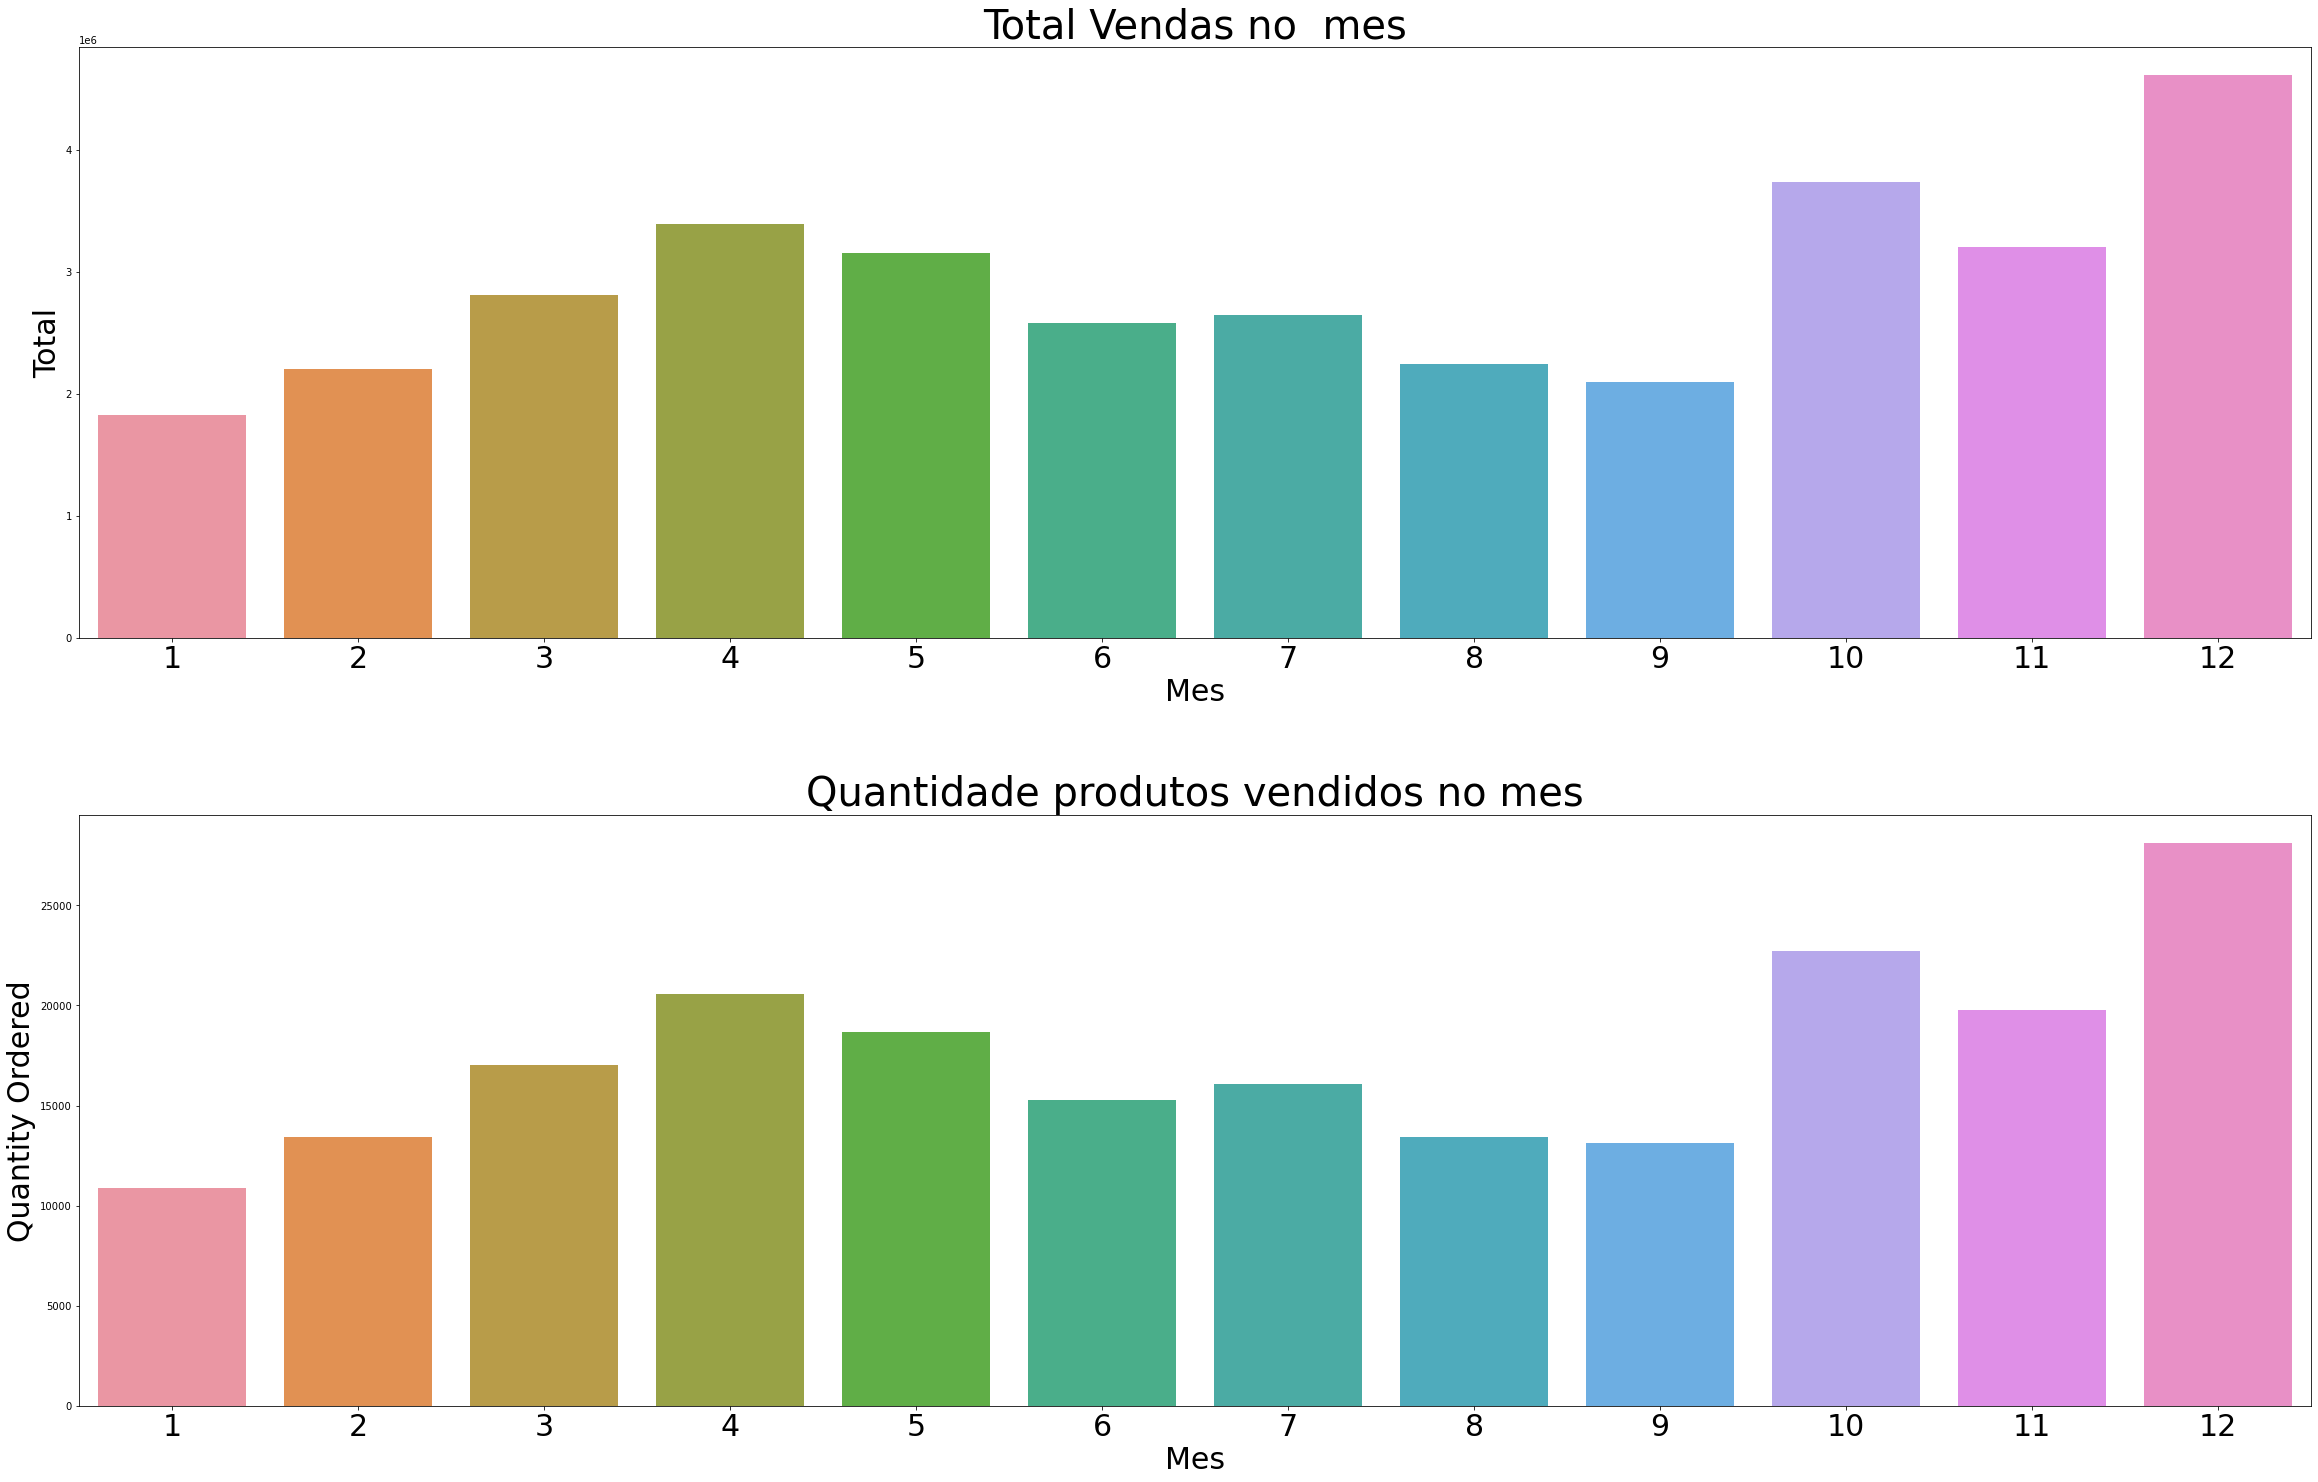

In [27]:
fig, axes = plt.subplots(2, 1, figsize = (40,25))
fig.subplots_adjust(hspace=.3)

sns.barplot(x='Mes', y='Total', data=MelhorMes, ax=axes[0])
axes[0].set_xlabel(axes[0].get_xlabel(), size=30)
axes[0].set_ylabel(axes[0].get_ylabel(), size=30)
axes[0].set_xticklabels(axes[0].get_xticklabels(), size=30)

axes[0].set_title('Total Vendas no  mes', size= 40)



sns.barplot(x='Mes', y='Quantity Ordered', data=MelhorMes, ax=axes[1])
axes[1].set_xlabel(axes[1].get_xlabel(), size=30)
axes[1].set_ylabel(axes[1].get_ylabel(), size=30)
axes[1].set_xticklabels(axes[1].get_xticklabels(), size=30)

axes[1].set_title('Quantidade produtos vendidos no mes', size= 40)


# Quais os produtos mais vendidos no ano de 2019 ( em quantidades) - avaliacao geral

In [28]:
Produtos = VendasConsolidado.groupby('Product')
QuantidadesProdutos = Produtos.sum()['Quantity Ordered']
QuantidadesProdutos.nlargest(5)





Product
AAA Batteries (4-pack)      31017
AA Batteries (4-pack)       27635
USB-C Charging Cable        23975
Lightning Charging Cable    23217
Wired Headphones            20557
Name: Quantity Ordered, dtype: int32

In [29]:
#analisar para os produto top5 as quantidades vendidas e o valor de cada item...vendeu muito pq eh mais barato?

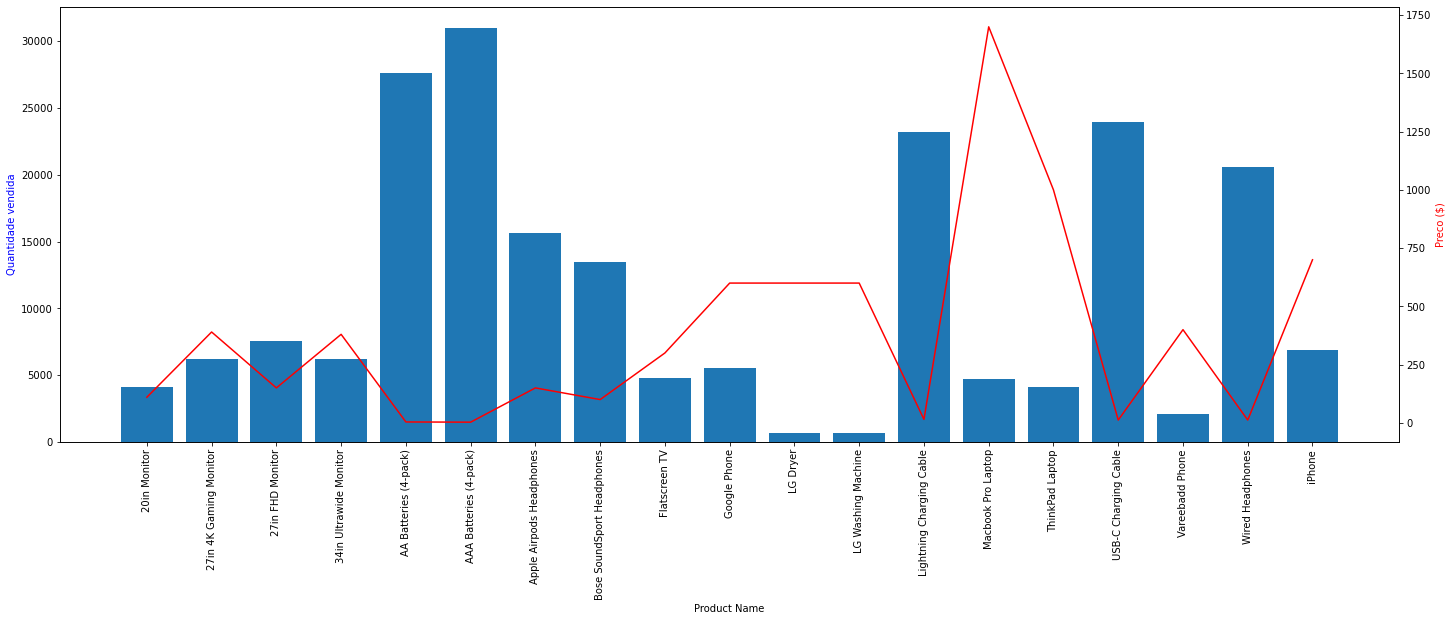

In [30]:

Produtos = VendasConsolidado.groupby('Product')
QuantidadesProdutos = Produtos.sum()['Quantity Ordered']


precos = VendasConsolidado.groupby('Product').mean()['Price Each']

produtos = [product for product, df in Produtos]


fig, ax1 = plt.subplots(figsize=(24, 8))
ax2 = ax1.twinx()

ax1.bar(produtos, QuantidadesProdutos)
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantidade vendida', color='b')
ax1.set_xticklabels(produtos, rotation='vertical')

ax2.plot(produtos, precos, 'r-')
ax2.set_ylabel('Preco ($)', color='r');

In [31]:
#responder se a maioria do montante vendido sao dos produtos mais caros ou dos produtos mais baratos 

 
#quais os top5 mais caros?

In [32]:

Produtos = VendasConsolidado.groupby('Product')
PrecosProdutos = Produtos.mean()['Price Each']
PrecosProdutos.nlargest(5)



Product
Macbook Pro Laptop    1700.00
ThinkPad Laptop        999.99
iPhone                 700.00
Google Phone           600.00
LG Dryer               600.00
Name: Price Each, dtype: float64

In [33]:
VendasConsolidado.head()



,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Ano,Mes,Total,Cidade,Estado,Postal Code
0,141234,iPhone,1,700.00,"944 Walnut St, Boston, MA 02215",2019,1,700.00,Boston,MA,02215
1,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035",2019,1,14.95,Portland,OR,97035
2,141236,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016",2019,1,23.98,San Francisco,CA,94016
3,141237,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001",2019,1,149.99,Los Angeles,CA,90001
4,141238,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301",2019,1,11.99,Austin,TX,73301


# Cidade que teve maior valor em vendas 

In [34]:


CidadeMaisvendas = VendasConsolidado.groupby('Cidade').sum().reset_index()
CidadeMaisvendas




,Cidade,Quantity Ordered,Price Each,Ano,Mes,Total
0,Atlanta,16602,2.779908e+06,30044739,104794,2.795499e+06
1,Austin,11153,1.809874e+06,19998197,69829,1.819582e+06
2,Boston,22528,3.637410e+06,40246750,141112,3.661642e+06
3,Dallas,16730,2.752628e+06,29921582,104620,2.767975e+06
4,Los Angeles,33289,5.421435e+06,59772496,208325,5.452571e+06
5,New York City,27932,4.635371e+06,50224654,175741,4.664317e+06
6,Portland,14053,2.307747e+06,25166837,87765,2.320491e+06
7,San Francisco,50239,8.211462e+06,90313920,315520,8.262204e+06
8,Seattle,16553,2.733296e+06,29743909,104941,2.747755e+06


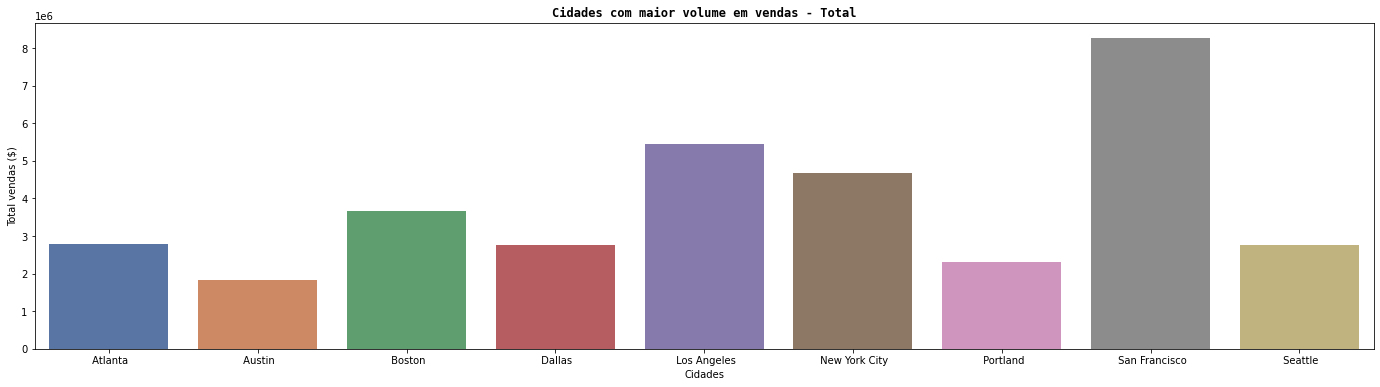

In [35]:

CidadesMaiorVendas = VendasConsolidado.groupby('Cidade').sum().astype('int')

plt.figure(figsize=(24, 6)) 

sns.barplot(
    x=CidadesMaiorVendas.index, 
    y=CidadesMaiorVendas['Total'], 
    data=CidadesMaiorVendas, palette='deep'
)

plt.title(
    'Cidades com maior volume em vendas - Total', 
    fontname='monospace', weight='bold'
)

plt.xlabel('Cidades')

plt.ylabel('Total vendas ($)');

In [36]:
# Sao francisco teve maior valor em Sales poq adiquiriu os produtos mais caros ou os produtos mais baratos ? analisar 

In [37]:
#analisar os produtos mais order em cada cidade e os produtos mais caros que sairam

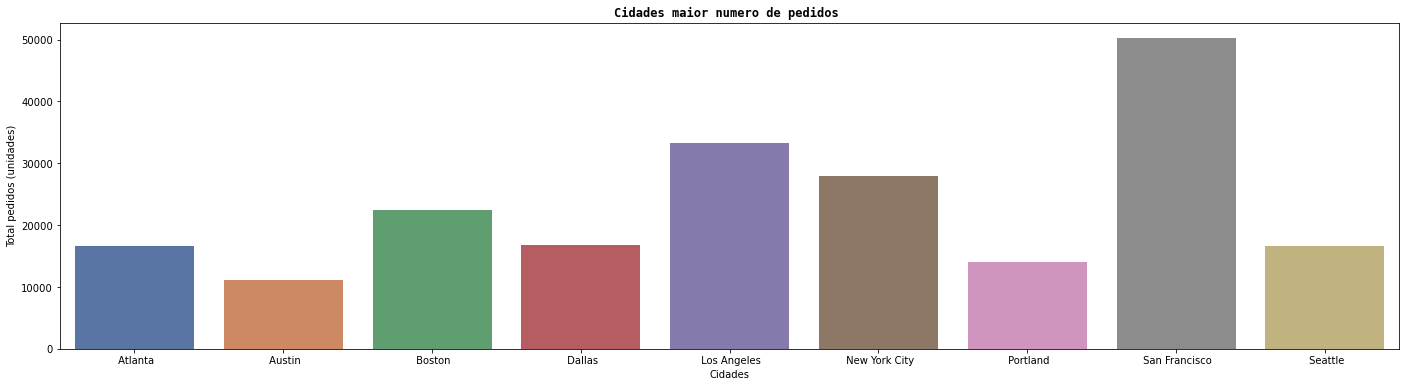

In [38]:
CidadesMaisPedidos = VendasConsolidado.groupby('Cidade').sum().astype('int')

plt.figure(figsize=(24, 6)) 

sns.barplot(
    x=CidadesMaisPedidos.index, 
    y=CidadesMaisPedidos['Quantity Ordered'], 
    data=CidadesMaisPedidos, palette='deep'
)

plt.title(
    'Cidades maior numero de pedidos ', 
    fontname='monospace', weight='bold'
)

plt.xlabel('Cidades')

plt.ylabel('Total pedidos (unidades)');

Para direcionar melhor as atividadesde marketing , vou clusterizar segmentos de consumidores para tracar melhores campanhas

In [90]:
VendasConsolidado.head()

,Product,Quantity Ordered,Price Each,Purchase Address,Ano,Mes,Total,Cidade,Estado,Postal Code
0,iPhone,1,700.00,"944 Walnut St, Boston, MA 02215",2019,1,700.00,Boston,MA,02215
1,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035",2019,1,14.95,Portland,OR,97035
2,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016",2019,1,23.98,San Francisco,CA,94016
3,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001",2019,1,149.99,Los Angeles,CA,90001
4,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301",2019,1,11.99,Austin,TX,73301


In [ ]:
The following steps are applied to preprocess the data:

Label encoding the categorical features
Scaling the features using the standard scaler
Creating a subset dataframe for dimensionality reduction

In [91]:
#Get list of categorical variables
s = (VendasConsolidado.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Product', 'Purchase Address', 'Cidade', 'Estado', 'Postal Code']


In [95]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    VendasConsolidado[i]=VendasConsolidado[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [96]:
VendasConsolidado.head()


,Product,Quantity Ordered,Price Each,Purchase Address,Ano,Mes,Total,Cidade,Estado,Postal Code
0,18,1,700.00,132266,2019,1,700.00,2,2,0
1,12,1,14.95,13519,2019,1,14.95,6,5,8
2,17,2,11.99,68669,2019,1,23.98,7,0,7
3,2,1,149.99,99824,2019,1,149.99,4,0,6
4,17,1,11.99,44894,2019,1,11.99,1,6,4


In [102]:

#Creating a copy of data
VendasConsolidadoCopy = VendasConsolidado.copy()

#Drop colunas que nao sao necessarias no modelo
VendasConsolidadoCopy = VendasConsolidadoCopy.drop(VendasConsolidadoCopy.columns[[4,5, 8, 9]], axis=1) 

VendasConsolidadoCopy.head()


,Product,Quantity Ordered,Price Each,Purchase Address,Total,Cidade
0,18,1,700.00,132266,700.00,2
1,12,1,14.95,13519,14.95,6
2,17,2,11.99,68669,23.98,7
3,2,1,149.99,99824,149.99,4
4,17,1,11.99,44894,11.99,1


In [103]:

#Scaling
scaler = StandardScaler()
scaler.fit(VendasConsolidadoCopy)
scaled_VendasConsolidadoCopy = pd.DataFrame(scaler.transform(VendasConsolidadoCopy),columns= VendasConsolidadoCopy.columns )
print("All features are now scaled")

All features are now scaled


In [104]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_VendasConsolidadoCopy.head()


Dataframe to be used for further modelling:


,Product,Quantity Ordered,Price Each,Purchase Address,Total,Cidade
0,1.646622,-0.280906,1.549604,1.521943,1.545449,-1.049773
1,0.532183,-0.280906,-0.509270,-1.399334,-0.512260,0.608363
2,1.460883,1.977493,-0.518166,-0.042597,-0.485136,1.022896
3,-1.325216,-0.280906,-0.103416,0.723842,-0.106635,-0.220705
4,1.460883,-0.280906,-0.518166,-0.627483,-0.521151,-1.464306


.In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.
Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

Steps in this section:

Dimensionality reduction with PCA
Plotting the reduced dataframe
Dimensionality reduction with PCA

For this project, I will be reducing the dimensions to 3.

In [105]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_VendasConsolidadoCopy)
PCA_VendasConsolidadoCopy = pd.DataFrame(pca.transform(scaled_VendasConsolidadoCopy), columns=(["col1","col2", "col3"]))
PCA_VendasConsolidadoCopy.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,185950.0,-6.167484e-17,1.442356,-4.425039,-0.585040,-0.376370,-0.193887,9.398339
col2,185950.0,-6.232291e-17,1.016596,-1.553114,-0.793993,0.103106,0.365753,12.301574
col3,185950.0,5.143058e-17,1.001678,-2.322136,-0.734554,-0.012784,0.695579,3.023689


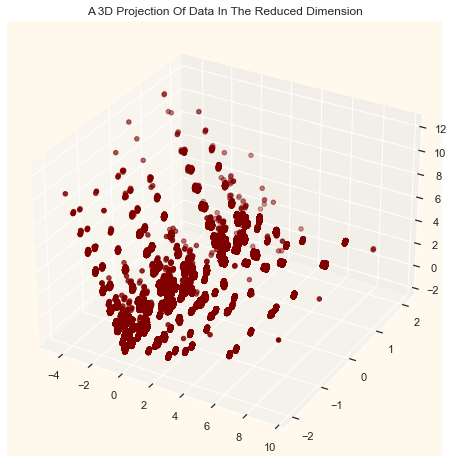

In [100]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_VendasConsolidadoCopy["col1"]
y =PCA_VendasConsolidadoCopy["col2"]
z =PCA_VendasConsolidadoCopy["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()